<a href="https://colab.research.google.com/github/SangeethaPaulraj26/DataScience/blob/main/kmeans_constructiondelays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [6]:
from google.colab import files
uploaded = files.upload()


Saving Road Constuction Delay Survey.csv to Road Constuction Delay Survey (2).csv


In [8]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Road Constuction Delay Survey.csv', encoding='latin1')
df.head()



,Respondent Number,Category 1: Materials,Category 1: Materials.1,Category 1: Materials.2,Category 1: Materials.3,Category 1: Materials.4,Category 2: Labor and Equipment,Category 2: Labor and Equipment.1,Category 2: Labor and Equipment.2,Category 2: Labor and Equipment.3,...,Category 8: Scope of work.3,Category 9: External issues,Category 9: External issues .1,Category 9: External issues .2,Respondant Information,Respondant Information.1,Respondant Information.2,Respondant Information.3,Respondant Information.4,Respondant Information.5
0,NaN,1.Delay in delivering material to construction...,2.Monopoly of material by some suppliers,3.Prices fluctuation,4.Types of material availability at local market,5.Lack of consultants knowledge of available ...,6.Low productivity,7.Poor work execution,8.Shortage of laborers,9.Mistakes happens during construction phase,...,41.Rework due to error in execution,42.Weather conditions,43.Accidents during construction,44.Delay in getting NOCs from different govern...,Type of Organization,Respondents designation,Indicate the highest formal qualification,How often do you experience cost overrun,Location of organization,Relevant working experience
1,1.0,1,1,1,1,1,1,1,1,1,...,1,2,2,3,1,2,2,2,3,5
2,2.0,2,5,3,2,3,2,2,2,3,...,3,1,1,4,1,3,2,3,3,3
3,3.0,1,2,1,1,2,2,1,2,1,...,2,1,1,4,1,2,2,1,2,4
4,4.0,2,2,3,3,2,2,3,4,4,...,3,4,3,3,1,3,1,1,3,4


In [9]:
# Check for nulls and basic info
print(df.info())
print(df.describe())

# Fill or drop missing values as needed
df = df.dropna()  # or df.fillna(method='ffill')

# Select only numerical columns (or encode categorical ones)
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Respondent Number                           143 non-null    float64
 1   Category 1: Materials                       144 non-null    object 
 2   Category 1: Materials.1                     144 non-null    object 
 3   Category 1: Materials.2                     144 non-null    object 
 4   Category 1: Materials.3                     144 non-null    object 
 5   Category 1: Materials.4                     144 non-null    object 
 6   Category 2: Labor and Equipment             144 non-null    object 
 7   Category 2: Labor and Equipment.1           144 non-null    object 
 8   Category 2: Labor and Equipment.2           144 non-null    object 
 9   Category 2: Labor and Equipment.3           144 non-null    object 
 10  Category 2: La

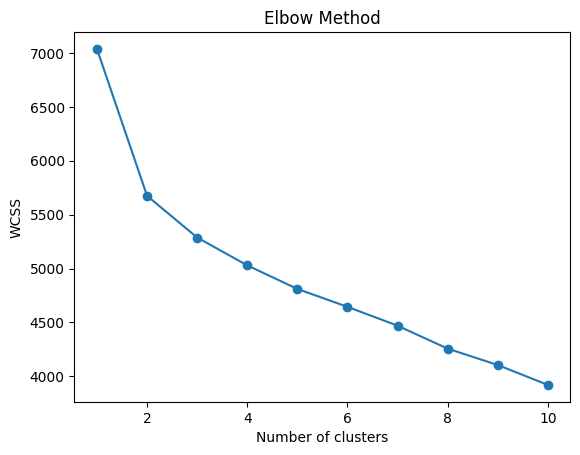

In [10]:
# Determine optimal number of clusters (Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
k = 4  # example
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters


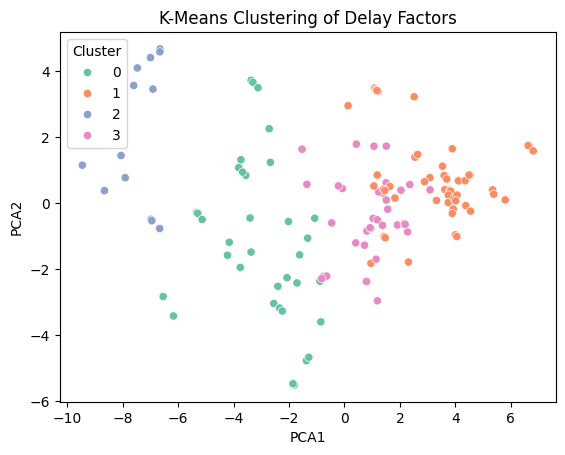

In [12]:
# Optional: Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clustering of Delay Factors')
plt.show()
